In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from copy import deepcopy

batch_size = 256
num_classes = 10

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='elu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='elu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
epochs = 50

In [ ]:
history_normal = deepcopy(model).fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

In [ ]:
y_noise = np.random.randint(0, 10, size=y_train.shape)
history_y_noise = deepcopy(model).fit(x_train, y_noise,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

In [ ]:
x_noise = np.random.uniform(size=x_train.shape)
y_noise = np.random.randint(0, 10, size=y_train.shape)

history_all_noise = deepcopy(model).fit(x_noise, y_noise,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

In [21]:
# https://arxiv.org/pdf/1611.03530.pdf

In [26]:
import pickle
pickle_out = open("history_normal.pickle","wb")
pickle.dump(history_normal, pickle_out)

pickle_out = open("history_y_noise.pickle","wb")
pickle.dump(history_y_noise, pickle_out)

pickle_out = open("history_all_noise.pickle","wb")
pickle.dump(history_all_noise, pickle_out)

In [33]:
import pickle
history_normal_pickle  = pickle.load(open("history_normal.pickle","rb"))
history_y_noise_pickle  = pickle.load(open("history_y_noise.pickle","rb"))
history_all_noise_pickle  = pickle.load(open("history_all_noise.pickle","rb"))

<IPython.core.display.Javascript object>


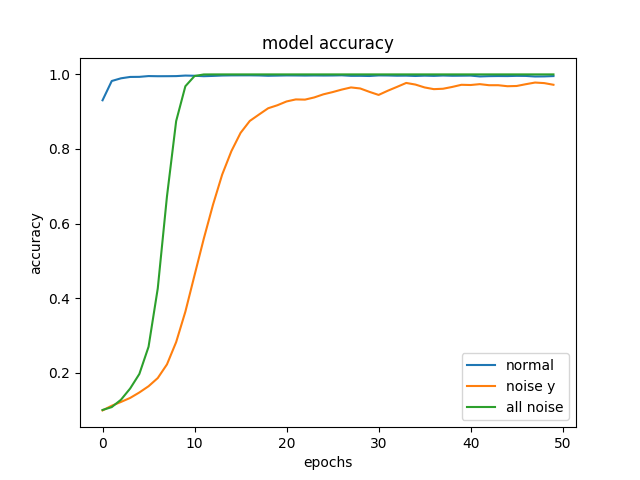

In [43]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(history_normal_pickle.history['acc'], label="normal")
plt.plot(history_y_noise_pickle.history['acc'], label="noise y")
plt.plot(history_all_noise_pickle.history['acc'], label="all noise")

plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.legend()
plt.show()


<IPython.core.display.Javascript object>


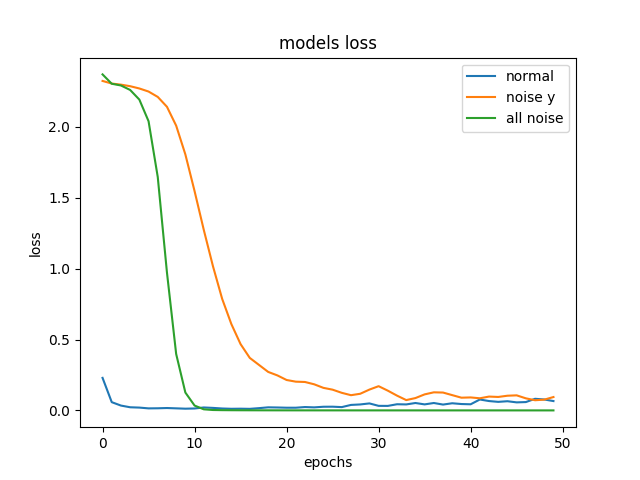

In [42]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(history_normal_pickle.history['loss'], label="normal")
plt.plot(history_y_noise_pickle.history['loss'], label="noise y")
plt.plot(history_all_noise_pickle.history['loss'], label="all noise")

plt.title("models loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()